<h1><center> Airbnb Amsterdam Price Prediction Report</center></h1>

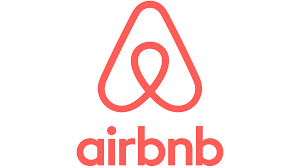

<h2><center>Mapalo Lukashi, Student ID: 800759428</center></h2>

## Table of Contents

* [Introduction](#zero-bullet)
* [Data Summary](#first-bullet)
* [Exploratory Data Analysis (EDA)](#second-bullet)
* [Inference](#third-bullet)
* [Modeling](#fourth-bullet)
* [Conclusion](#fifth-bullet)
* [References & Appendix](#sixth-bullet)

## Introduction <a class="anchor" id="zero-bullet"></a>

### Objectives


* Airbnb® is an American company operating an online marketplace for lodging, primarily for vacation rentals

* The purpose of my study is to perform an exploratory data analysis of the dataset containing Airbnb® listings for Amsterdam, a major city in the Netherlands. 

* I aim to use various data visualizations to gain valuable insights on whether there are any discernible relationships between the price of a listing, its location, and its room type?

* **Main Reserach Question:**
How do price, location (neighbourhood), and room type relate to each other in the Airbnb listings in Amsterdam?

* **Sub-Questions**

> * Price Analysis:

What is the distribution of listing prices in Amsterdam?
Are there significant differences in average prices across different neighbourhoods?
How does the price distribution vary among different room types?

> * Neighbourhood Analysis:

Which neighbourhoods have the highest concentration of Airbnb listings?
Are there notable differences in the types of room available in different neighbourhoods?

> * Room Type Analysis:

What is the distribution of different room types (Entire home/apt, Private room, etc.) in the dataset?
How does the average price vary across different room types?

> * Correlation Analysis:

Is there a correlation between the number of reviews and the price of listings?
Does the minimum number of nights required have any correlation with the listing price?

* Finally, the analysis in this project has been carried out using a structured Python package I built called 'airbnb_analysis' comprising of various modules (summary.py, analysis.py and inference.py) and classes.

* The structral order of my python package is as follows:

 
>airbnb_analysis/
│
├── __init__.py
├── summary.py
├── analysis.py
├── inference.py


### Data Source

I am working with a single dataset containing Listing Data for Airbnb Armsterdam, this data is sourced from an open source website called [inside_airbnb](http://insideairbnb.com/get-the-data/) and is authored by (Murray Cox).

I hand picked this dataset as it has both a considerable number of catigorical and numerical data attributes, that make for a better experience in data analysis work.

### Setup

* Importing necessary libraries and modules.
* Loading the dataset.

In [57]:
# Importing Libraries
import pandas as pd
import numpy as np
from datetime import date
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [58]:

# Import the necessary classes from your package
from airbnb_analysis.summary import DataSummary
from airbnb_analysis.analysis import ExploratoryDataAnalysis
from airbnb_analysis.inference import Inference
from airbnb_analysis.modeling import Modeling




In [59]:
# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/Mapalo2023/airbnb_modeling/main/data/listings.csv")
target='price'

## Data Summary <a class="anchor" id="first-bullet"></a>

In [60]:
# Create instances of the classes
data_summary = DataSummary(data)
analysis = ExploratoryDataAnalysis(data)
inference = Inference(data)
modeling = Modeling(data,target)



#Summary statistics were generated for both numerical and categorical variables to understand the basic distribution of data.

In [61]:
# Display the head of the dataset (first 5 records)
data_summary.display_head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,761411.0,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2,272,26,0363 D4AD DCF3 E72A 56A2
1,768274.0,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,J & R,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,1,16,6,0363 7A50 18E7 51D1 B7F9
2,768737.0,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,Nicole,Westerpark,52.37824,4.86826,Private room,109,2,341,3,29,43,036396BE30827DDB9575
3,771217.0,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,Danielle,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,1,0,0,0363 D807 AD6C 499A F871
4,771343.0,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,Marcel,Centrum-West,52.37641,4.88303,Private room,150,1,699,2,196,110,0363 8C61 E9B9 5582 913E


In [62]:
# Display the tail of the dataset (last 5 records)
data_summary.display_tail()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
8381,9.714037e+17,Rental unit in Amsterdam · ★New · 1 bedroom · ...,6879236,Michiel,Oud-Noord,52.394972,4.906180,Entire home/apt,250,3,0,1,9,0,0363 9080 FE38 A7CE E7B7
8382,9.716005e+17,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,307559908,Chris,Oud-Noord,52.387880,4.911080,Entire home/apt,337,3,0,1,267,0,0363 5639 0AD2 7A88 3FED
8383,9.716865e+17,Rental unit in Amsterdam · ★New · 1 bedroom · ...,170194324,Yara,Bos en Lommer,52.386497,4.848041,Entire home/apt,135,6,0,1,13,0,0363 C287 34D9 EA25 9428
8384,9.717582e+17,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,55794534,David,Centrum-West,52.372431,4.894491,Private room,160,5,0,1,6,0,Exempt
8385,9.722182e+17,Condo in Amsterdam · ★New · 2 bedrooms · 1 bed...,2876582,Doris,De Pijp - Rivierenbuurt,52.342122,4.909411,Entire home/apt,211,7,0,1,55,0,0363 2F20 4F53 FB57 2D7F


### Checking for Missing / Invalid Data Values

In [63]:
#The output shows that the dataset contains 8386 rows and 18 columns.
print(data_summary.get_shape())

(8386, 15)


In [64]:
print(data_summary.data_types())

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


In [65]:
data_summary.missing_value_summary()

,count,percent
id,0,0.000000
name,0,0.000000
host_id,0,0.000000
host_name,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000
minimum_nights,0,0.000000


In [66]:
# This shows the missing value percentage per attribute
data_summary.missing_value_percent()

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           0.214643
dtype: float64

In [67]:
# Call the static method to drop the 'neighbourhood_group' column
data = data_summary.drop_column(data, 'neighbourhood_group')
data

The column neighbourhood_group does not exist in the DataFrame.


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,7.614110e+05,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,Noord-Oost,52.401640,4.951060,Private room,61,3,303,2,272,26,0363 D4AD DCF3 E72A 56A2
1,7.682740e+05,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,J & R,Westerpark,52.388550,4.885210,Entire home/apt,327,3,78,1,16,6,0363 7A50 18E7 51D1 B7F9
2,7.687370e+05,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,Nicole,Westerpark,52.378240,4.868260,Private room,109,2,341,3,29,43,036396BE30827DDB9575
3,7.712170e+05,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,Danielle,Zuid,52.340910,4.848020,Entire home/apt,290,3,10,1,0,0,0363 D807 AD6C 499A F871
4,7.713430e+05,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,Marcel,Centrum-West,52.376410,4.883030,Private room,150,1,699,2,196,110,0363 8C61 E9B9 5582 913E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,9.714037e+17,Rental unit in Amsterdam · ★New · 1 bedroom · ...,6879236,Michiel,Oud-Noord,52.394972,4.906180,Entire home/apt,250,3,0,1,9,0,0363 9080 FE38 A7CE E7B7
8382,9.716005e+17,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,307559908,Chris,Oud-Noord,52.387880,4.911080,Entire home/apt,337,3,0,1,267,0,0363 5639 0AD2 7A88 3FED
8383,9.716865e+17,Rental unit in Amsterdam · ★New · 1 bedroom · ...,170194324,Yara,Bos en Lommer,52.386497,4.848041,Entire home/apt,135,6,0,1,13,0,0363 C287 34D9 EA25 9428
8384,9.717582e+17,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,55794534,David,Centrum-West,52.372431,4.894491,Private room,160,5,0,1,6,0,Exempt


In [68]:
data_summary.missing_value_summary()

,count,percent
id,0,0.000000
name,0,0.000000
host_id,0,0.000000
host_name,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000
minimum_nights,0,0.000000


In [69]:
# A brief summary of the dataset I am working with
data_summary.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8386 non-null   float64
 1   name                            8386 non-null   object 
 2   host_id                         8386 non-null   int64  
 3   host_name                       8386 non-null   object 
 4   neighbourhood                   8386 non-null   object 
 5   latitude                        8386 non-null   float64
 6   longitude                       8386 non-null   float64
 7   room_type                       8386 non-null   object 
 8   price                           8386 non-null   int64  
 9   minimum_nights                  8386 non-null   int64  
 10  number_of_reviews               8386 non-null   int64  
 11  calculated_host_listings_count  8386 non-null   int64  
 12  availability_365                83

In [70]:
# Show the categorical variables descriptive statistics
data_summary.categorical_descriptive_statistics()

,name,host_name,neighbourhood,room_type,license
count,8386,8386,8386,8386,8368
unique,3715,3200,22,4,7288
top,Rental unit in Amsterdam · ★5.0 · 1 bedroom · ...,Thomas,De Baarsjes - Oud-West,Entire home/apt,Exempt
freq,296,42,1382,6477,609


In [71]:
# Shows the numerical variables descriptive statistics
data_summary.numerical_descriptive_statistics()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.386000e+03,8.386000e+03,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000
mean,2.973884e+17,1.077878e+08,52.366603,4.889834,254.489864,5.046625,45.437753,1.831624,82.825066,10.848080
std,3.905819e+17,1.448316e+08,0.017191,0.035403,395.468275,34.710395,107.352805,2.857336,113.568083,30.815465
min,2.818000e+03,3.159000e+03,52.290340,4.755870,18.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.851464e+07,1.025536e+07,52.355640,4.865501,150.000000,2.000000,3.000000,1.000000,0.000000,0.000000
50%,4.242761e+07,3.642318e+07,52.365769,4.887580,207.000000,3.000000,10.000000,1.000000,18.000000,3.000000
75%,7.227894e+17,1.444334e+08,52.376440,4.908708,300.000000,4.000000,36.000000,1.000000,142.000000,8.000000
max,9.722182e+17,5.349544e+08,52.425159,5.026430,27857.000000,1001.000000,3199.000000,27.000000,365.000000,1689.000000


### My Dataset Summary Observations:__ Univariate Analysis

* This is a type of pandas Dataframe*

* Index ranges from 0-8385,meaning it has 8386 rows*

* Total number of columns 18*

* eight integer data types and 6 attributes are in object form and four are in float form,*

* Dataset used computer memory 1.2+ Megabyte*

* last_review and reviews_per_month have some null values, other attributes have no null values,*

* PROPORTION OF last_review AMONG ALL Listings and reviews_per_month has 9.8% null values,*
* neighbourhood_group has 100% null values*

## Exploratory Data Analysis <a class="anchor" id="second-bullet"></a>

EDA is crucial for understanding the distribution of data, identifying outliers, and discovering patterns. I began by examining the unique values and their counts for crucial categorical variables like neighbourhood and room_type.

In [72]:
# Print the column names of the DataFrame
print(analysis.data.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [73]:
# display unique values of 'neighbourhood'
analysis.unique_neighbourhood()

array(['Noord-Oost', 'Westerpark', 'Zuid', 'Centrum-West', 'Slotervaart',
       'Centrum-Oost', 'Oostelijk Havengebied - Indische Buurt',
       'Buitenveldert - Zuidas', 'IJburg - Zeeburgereiland', 'Oud-Oost',
       'De Pijp - Rivierenbuurt', 'De Baarsjes - Oud-West',
       'Bos en Lommer', 'Watergraafsmeer', 'Oud-Noord', 'Noord-West',
       'Geuzenveld - Slotermeer', 'De Aker - Nieuw Sloten', 'Osdorp',
       'Bijlmer-Centrum', 'Gaasperdam - Driemond', 'Bijlmer-Oost'],
      dtype=object)

In [74]:
# This code gets the value counts for the airbnb_listing neighbourhood value counts: 
#from the ouptut, Most appear to span the De Baarsjes - Oud-West  neighbourhood as mode_value
analysis.neighbourhood_value_counts()

De Baarsjes - Oud-West                    1382
Centrum-West                              1006
De Pijp - Rivierenbuurt                    935
Centrum-Oost                               793
Zuid                                       599
Westerpark                                 584
Oud-Oost                                   506
Bos en Lommer                              424
Oud-Noord                                  402
Oostelijk Havengebied - Indische Buurt     320
Watergraafsmeer                            262
Noord-West                                 218
IJburg - Zeeburgereiland                   183
Slotervaart                                164
Noord-Oost                                 137
Geuzenveld - Slotermeer                    116
Buitenveldert - Zuidas                     100
De Aker - Nieuw Sloten                      74
Gaasperdam - Driemond                       51
Bijlmer-Centrum                             47
Osdorp                                      44
Bijlmer-Oost 

In [75]:
# This code gets the value counts for the airbnb_listing room_type attribute:
# Most appear to span the Entire home/apt room_type (mode value)
print(analysis.unique_room_type())

['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


In [76]:
# This code gets the value counts for the airbnb_listing variable: Most appear to span the Entire home/apt room_type (mode value)
print(analysis.room_type_value_counts())

Entire home/apt    6477
Private room       1813
Hotel room           54
Shared room          42
Name: room_type, dtype: int64


### Analysing some categorical attributes

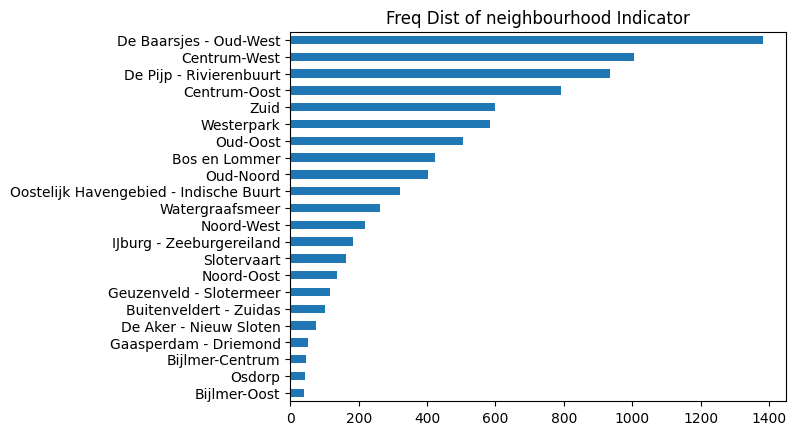

In [77]:
#Analysing the categorical attribute neighbourhood
analysis.bar_plot_neighbourhood()

The bar chart provides a frequency distribution of Airbnb listings across different neighbourhoods in Amsterdam. 

> **De Baarsjes - Oud-West** 
is the neighbourhood with the highest number of listings, suggesting it is a popular area for Airbnb hosts. This could be due to various factors such as proximity to tourist attractions, accessibility, or a higher demand for accommodations in that area.
> **Centrum-West**, 
which is likely to be a central part of Amsterdam, also has a high number of listings, underscoring its appeal to visitors who want to stay in central locations.
> **De Pijp - Rivierenbuurt and Centrum-Oost** follow closely behind, indicating these are also preferred neighbourhoods for Airbnb listings.
**Zuid and Westerpark** have a moderate number of listings, which could be due to a balance between demand and the residential nature of these neighbourhoods.

> Towards the bottom of the chart, neighbourhoods like Osdorp, Bijlmer-Oost, and Bijlmer-Centrum have the fewest listings, which might reflect less tourist traffic or a smaller number of available properties to rent.

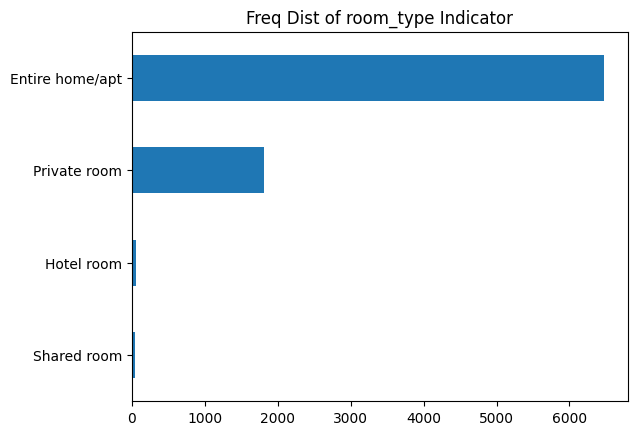

In [78]:
#Analysing the categorical attribute room_type
analysis.bar_plot_room_type()

The bar chart illustrates the frequency distribution of different room types available in Airbnb listings.

> **Entire home/apt** is by far the most common room type listed on Airbnb, which indicates a strong preference or demand for entire spaces among guests using Airbnb in Amsterdam.
> **Private rooms** are the second most common type, but significantly less frequent than entire homes/apartments, suggesting that while there is a market for private rooms, the demand is not as high as for entire spaces.
> **Hotel rooms and shared rooms** are much less common, indicating these are niche offerings in the Airbnb market in Amsterdam.

### Analysing some numeric attributes

In [79]:
print(analysis.price_describe())

count     8386.000000
mean       254.489864
std        395.468275
min         18.000000
25%        150.000000
50%        207.000000
75%        300.000000
max      27857.000000
Name: price, dtype: float64


Here is a breakdown and interpretation of these statistics:

> **Count:** There are 8,386 listings in the dataset, which is the sample size for this analysis.

> **Mean:** The average price of a listing is approximately 254.49. This suggests that on average, a night's stay in an Amsterdam Airbnb listing costs about this amount.

> **Standard Deviation (std):** The value of approximately 395.47 is quite high relative to the mean, indicating a large variation in listing prices. This could be due to a wide range of accommodation types, from budget rooms to luxury apartments.

> **Minimum (min):** The lowest price for a listing is 18, which might represent a shared room or a very modest accommodation.

> **25th Percentile**: 25% of the listings are priced at 150 or below, suggesting that a quarter of the accommodations are relatively budget-friendly.

> **50th Percentile (Median):** The median price is 207, meaning that half of the listings are priced below this amount and half above. The median being lower than the mean indicates a right-skewed distribution, where more listings are at the lower end of the price range but there are some listings with very high prices that raise the average.

> **75th Percentile:** At the 300 mark, 75% of the listings have this price or lower, which implies that most of the Airbnb listings are below the mid-range price level.

> **Maximum (max):** The maximum price is 27,857, which is significantly higher than the mean and median, indicating the presence of some extremely high-priced listings that could be luxury accommodations or properties rented for longer periods

In [80]:
analysis.minimum_nights_describe()

count    8386.000000
mean        5.046625
std        34.710395
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max      1001.000000
Name: minimum_nights, dtype: float64

Here is a breakdown and interpretation of these statistics:

> **Count:** There are 8,386 listings in the dataset, which gives the total number of records for the analysis of minimum nights.

> **Mean:** The average minimum number of nights guests are required to book is about 5.05, indicating a general preference for short stays.

> **Standard Deviation (std):** A high standard deviation of approximately 34.71 suggests there is a wide range in the minimum stay requirements across different listings.

> **Minimum (min):** The shortest stay required is 1 night, which is quite common for Airbnb listings.

> **25th Percentile:** 25% of listings require a stay of 2 nights or less.

> **50th Percentile (Median):** The median requirement is 3 nights, suggesting that half of the listings are available for shorter stays and half for longer stays.

> **75th Percentile:** 75% of listings require 4 nights or less, indicating that most listings cater to short-term stays.

> **Maximum (max):** There is an outlier where a listing requires a minimum of 1,001 nights, which could either be an error, a special case for a long-term rental, or a listing that essentially does not want to be rented out through the platform.

In [81]:
analysis.number_of_reviews_describe()

count    8386.000000
mean       45.437753
std       107.352805
min         0.000000
25%         3.000000
50%        10.000000
75%        36.000000
max      3199.000000
Name: number_of_reviews, dtype: float64

Here is a breakdown and interpretation of these statistics:

> **Count:** There are 8,386 Airbnb listings included in the dataset for analysis.

> **Mean:** The average number of reviews per listing is about 45.44. This suggests that a typical listing has been reviewed approximately 45 times.

> **Standard Deviation (std):** The standard deviation is approximately 107.35, which is quite large relative to the mean. This implies a wide variance in the number of reviews per listing, indicating that while some listings have many reviews, others have very few or none.

> **Minimum (min):** The minimum value is 0, which means there are listings that have not received any reviews.
25th Percentile: 25% of listings have 3 or fewer reviews, suggesting that a quarter of the listings are relatively new or infrequently booked.

> **50th Percentile (Median):** The median number of reviews is 10, meaning that half of the listings have 10 or fewer reviews. This value being lower than the mean indicates a right-skewed distribution of reviews, with a significant number of listings having a low number of reviews and a few listings having a very high number of reviews.

> **75th Percentile:** 75% of listings have 36 or fewer reviews, which shows that most listings do not accumulate a high number of reviews.

> **Maximum (max):** The highest number of reviews for a single listing is 3,199. This could indicate a very popular or a long-standing listing.

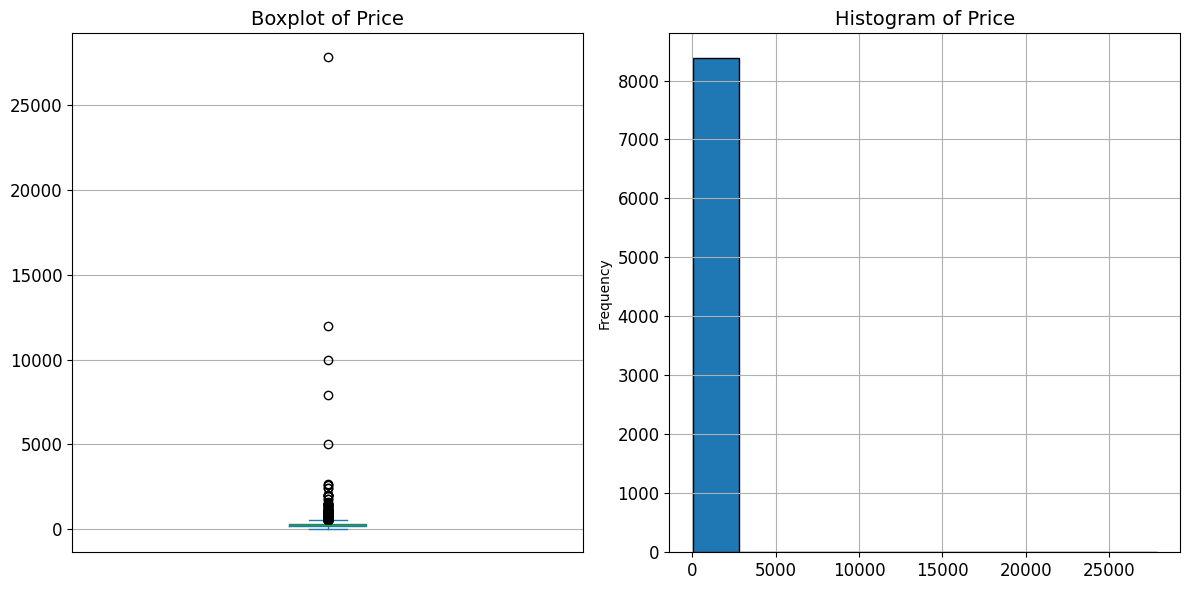

In [82]:
# Call the method to plot the price distribution with mathplotlib
analysis.plot_price_distribution()

Interpretation

> The boxplot shows many dots beyond the whiskers, this indicates that there are many outliers in the price data, which could be due to luxury listings or those with special features that command higher prices.

> The central box being close to the bottom of the data range suggests that the majority of listings are lower-priced, while only a few are high-priced, which would also indicate a right-skewed distribution.

> A histogram with most bars at the left side and the height of the bars decreasing as the price increases would confirm a right-skewed distribution, which is typical for such data.

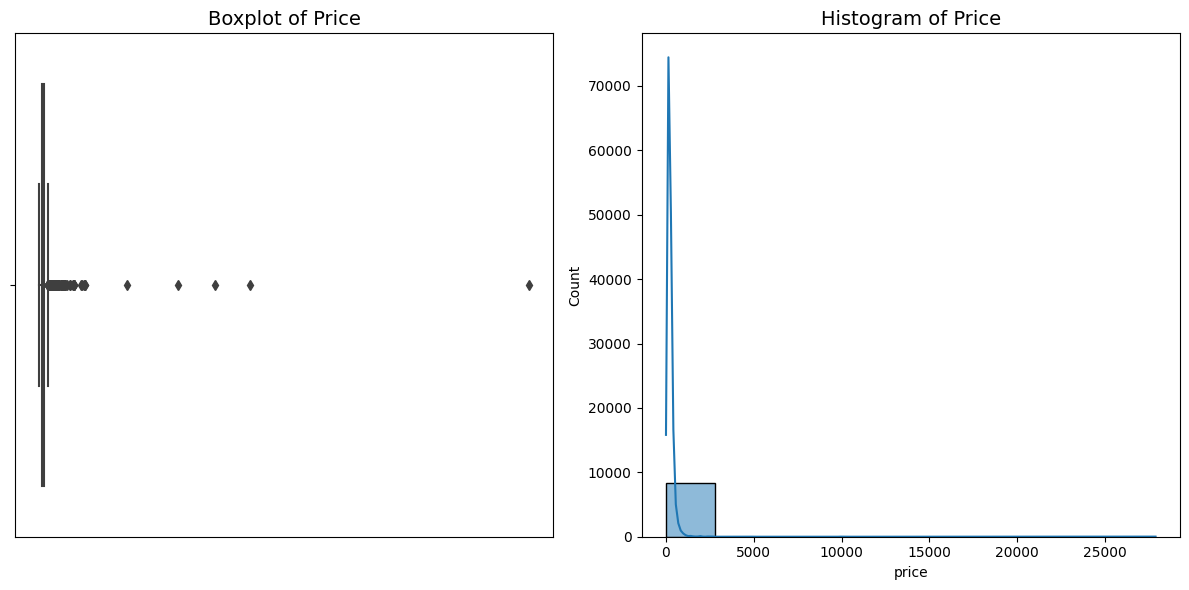

In [83]:
# Call the method to plot price distribution with Seaborn
analysis.plot_price_distribution_seaborn()

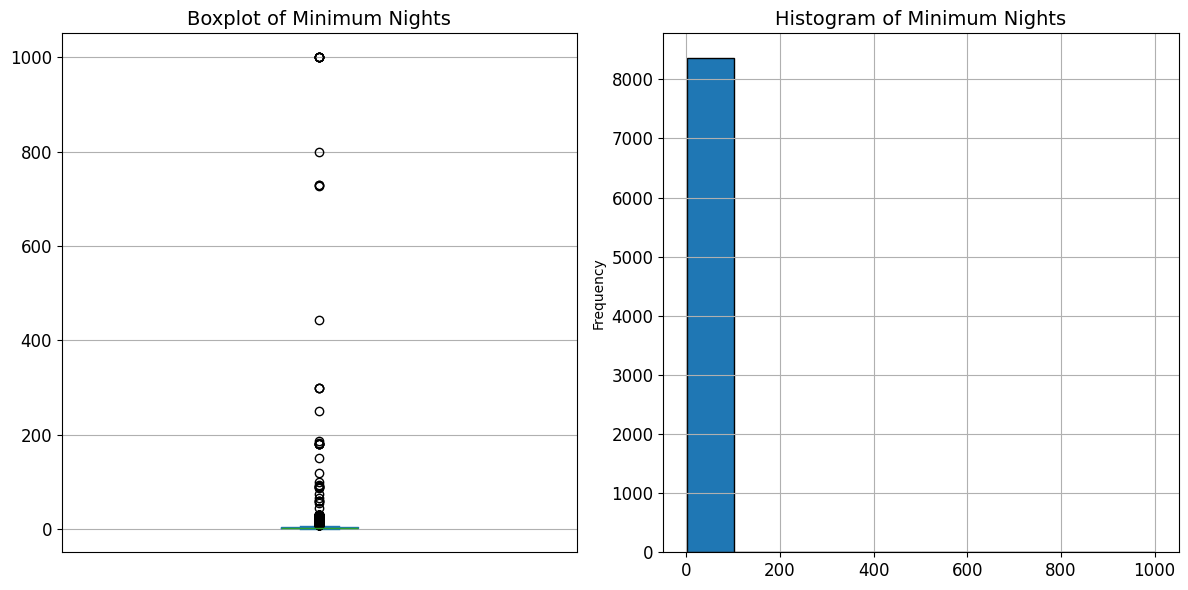

In [84]:
analysis.plot_minimum_nights_distribution()

#### **Boxplot Interpretation:**
> * The boxplot for minimum nights shows a concentration of values at the lower end, with a median value that appears to be quite 
low compared to the maximum value, which indicates a right-skewed distribution.

> * There are several outliers, which are represented by points that fall outside of the "whiskers" or the range that contains the 
bulk of the data. These outliers suggest that there are a few listings with an unusually high minimum night requirement.

> * The interquartile range (the height of the box) is small compared to the range of outliers, which suggests that most listings require only a short minimum stay.

#### **Histogram Interpretation:**

> * The histogram, which should typically show the frequency of listings across different minimum night requirements, is not fully visible in the provided snippet. However, we can infer that most listings have a very low minimum night requirement because the first bar is tall, and it appears that few listings require more than a small number of nights.

> * Given the scale of the x-axis goes up to 1000, and that there's a significant drop-off after the first bar, this further confirms the presence of outliers with a very high minimum night requirement.


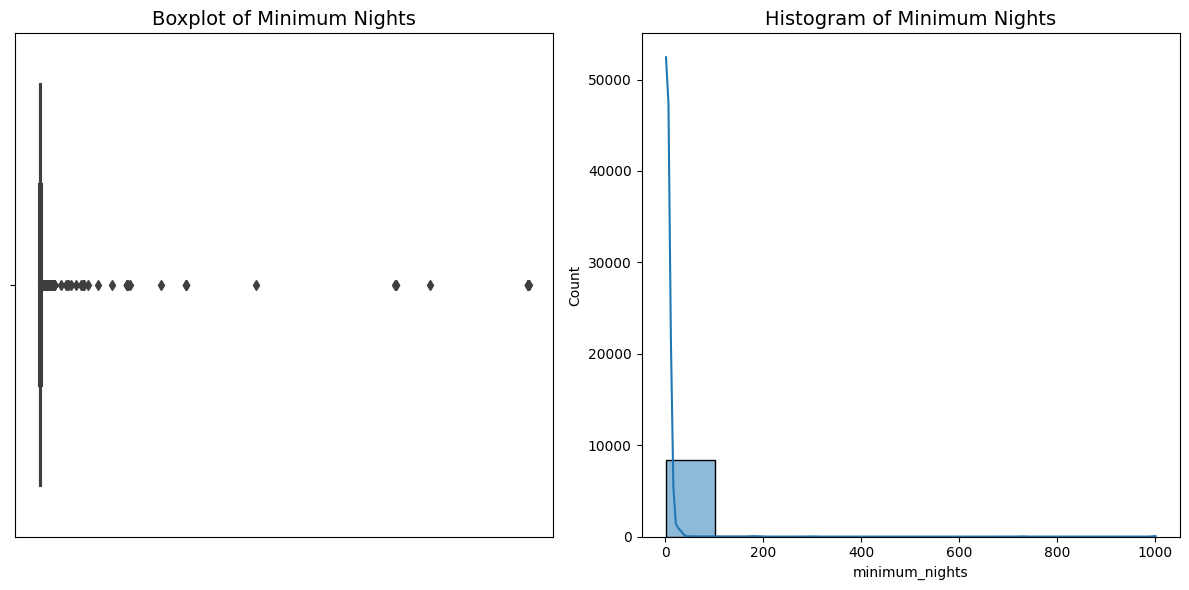

In [85]:
# Call the method to plot the minimum_nights_distribution distribution with Seaborn
analysis.plot_minimum_nights_distribution_seaborn()

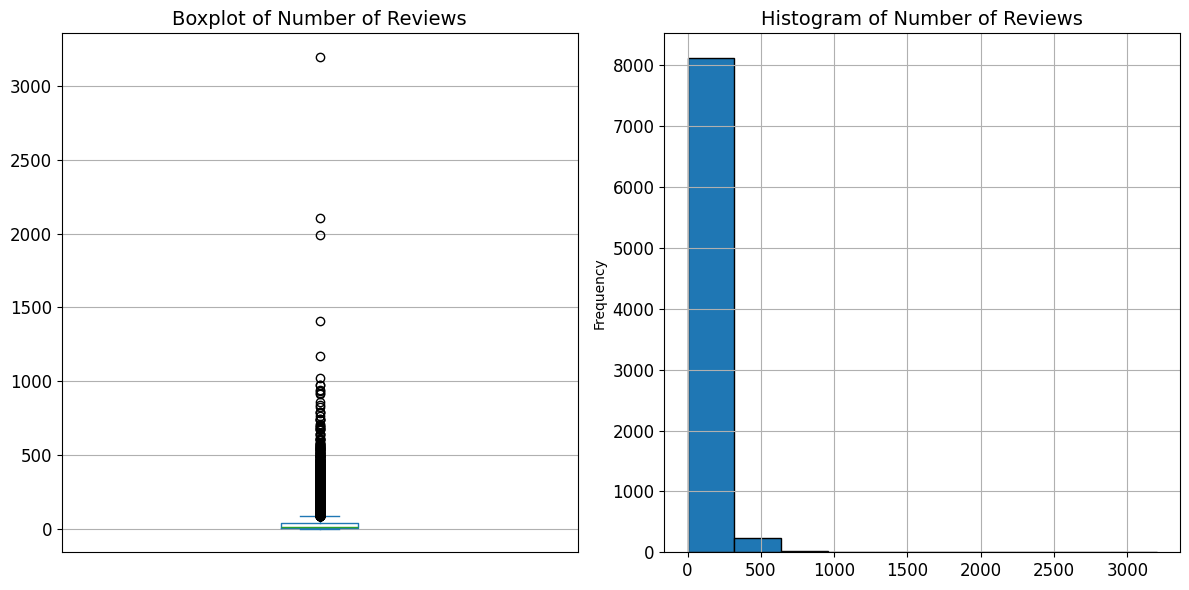

In [86]:
# Call the method to plot the number of reviews distribution with mathplotlib
analysis.plot_number_of_reviews_distribution()

#### **Boxplot Interpretation**

> * The boxplot appears to show a large number of outliers, which indicates that there are listings with an exceptionally high number of reviews. The main body of the boxplot (the box itself), which represents the interquartile range (IQR), is quite compact, indicating that the middle 50% of the data is clustered within a small range.

> * The median (indicated by the line within the box) is closer to the bottom of the box, suggesting a right-skewed distribution.

> * The "whiskers" of the boxplot (the lines extending from the top and bottom of the box) do not extend very far, indicating that the majority of listings have a relatively low number of reviews, and the high values are outliers.

#### **Histogram Interpretation**

> * The histogram on the right side, the first bar is significantly taller than the others, which suggests that a large number of listings have a low number of reviews.

> * Given the scale on the x-axis, it seems that the frequency of listings quickly drops as the number of reviews increases, which is consistent with a right-skewed distribution where most listings have fewer reviews.

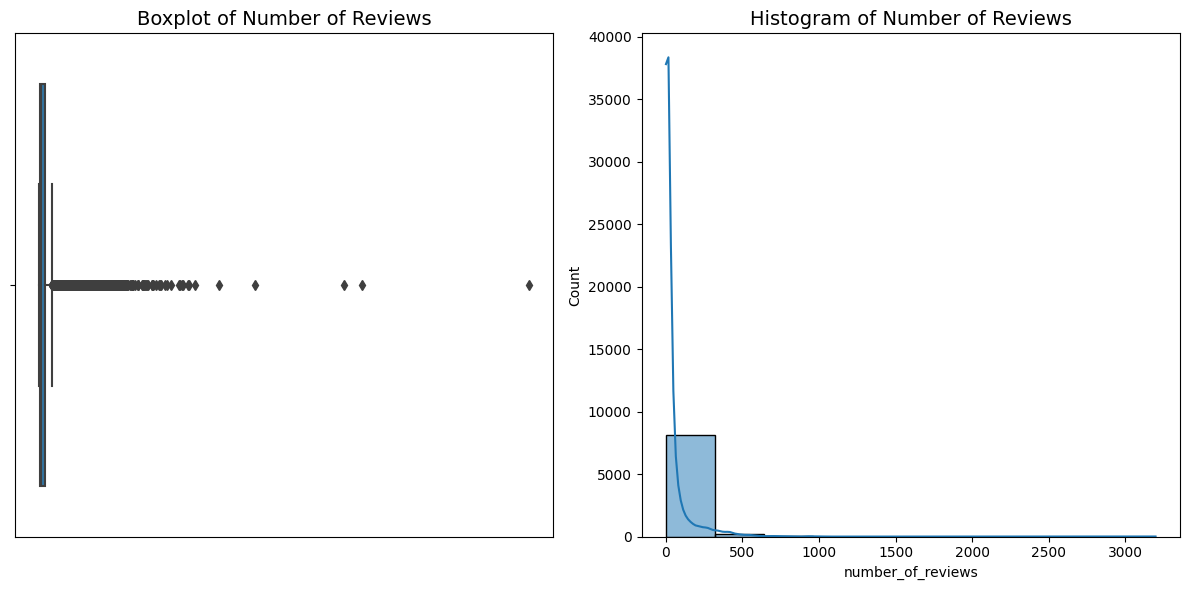

In [87]:
# Call the method to plot the number of reviews distribution with Seaborn
analysis.plot_number_of_reviews_distribution_seaborn()

### Grouping and Aggregating Data

In [88]:
grouped_data = data.groupby('neighbourhood').agg({'price': 'mean', 'id': 'count'})
# Use pivot tables or pd.melt as needed
grouped_data

,price,id
neighbourhood,,
Bijlmer-Centrum,146.361702,47
Bijlmer-Oost,168.794872,39
Bos en Lommer,197.915094,424
Buitenveldert - Zuidas,208.270000,100
Centrum-Oost,306.925599,793
Centrum-West,307.746521,1006
De Aker - Nieuw Sloten,223.972973,74
De Baarsjes - Oud-West,246.507959,1382
De Pijp - Rivierenbuurt,268.487701,935


> **Bijlmer-Centrum:** Has the lowest average price among the listed neighbourhoods at approximately 146.36, with a total of 47 listings.

> **Bijlmer-Oost:** Shows a slightly higher average price of about 168.95, with 39 listings.

> **Centrum-Oost and Centrum-West:** These central areas have the highest average prices, over 300, which is consistent with central locations in major cities often being > the most expensive due to their proximity to attractions and amenities.

> **De Baarsjes - Oud-West:** Has a relatively high number of listings (1382) with an average price of about 246.51, indicating it is a popular area for Airbnb rentals.

> **De Pijp - Rivierenbuurt:** Also shows a high number of listings (935) with an average price around 268.49, suggesting it's a desirable location for guests.

> **Noord-Oost and Slotervaart:** Have more moderate average prices (around 192-193) and fewer listings compared to more central areas.

> **Zuid:** Also shows a higher average price, around 290.27, with a relatively high number of listings (599), suggesting it's a premium area.

#### **Research Question Implications**

> **Price Analysis:** The variation in average prices across neighbourhoods can be indicative of the desirability and demand in different areas.

> **Listing Distribution:** The number of listings in each neighbourhood can help understand market saturation and popularity among hosts and guests.

> **Market Dynamics:** The relationship between the average price and the number of listings may reveal how supply and demand dynamics affect pricing in different neighbourhoods.

### Creating a Pivot Table

In [89]:
analysis.create_pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Bijlmer-Centrum,165.160000,NaN,125.000000,NaN
Bijlmer-Oost,227.681818,NaN,92.588235,NaN
Bos en Lommer,207.368421,NaN,118.666667,66.000000
Buitenveldert - Zuidas,221.283582,NaN,181.848485,NaN
Centrum-Oost,339.994275,434.500000,241.816406,176.888889
Centrum-West,380.366221,228.142857,200.253230,206.000000
De Aker - Nieuw Sloten,315.875000,NaN,156.487805,50.000000
De Baarsjes - Oud-West,262.328257,179.714286,151.256545,227.000000
De Pijp - Rivierenbuurt,286.721535,175.000000,152.870968,59.000000


From the provided information, here's a summary of what the pivot table shows:

> **Entire home/apt:** This room type has prices listed for almost every neighbourhood, indicating it is the most commonly available type on Airbnb across different areas. Prices vary, with some neighbourhoods like Centrum-West and Centrum-Oost showing higher average prices, which is consistent with central locations typically being more expensive.

> **Hotel room:** There are many 'NaN' (Not a Number) entries in this column, which suggests that hotel rooms are less commonly listed on Airbnb or that data is not available for those neighbourhoods. Where data is available, the prices can vary significantly, like in Centrum-Oost where the average is quite high.

> **Private room:** This room type is more commonly listed than hotel rooms, with a wide range of prices. Some neighbourhoods like Bijlmer-Oost have a low average price, while others like De Baarsjes - Oud-West have higher prices.

> **Shared room:** Similar to hotel rooms, shared rooms are not commonly listed, as indicated by the 'NaN' entries. Where prices are available, they seem to be lower than for entire homes or private rooms, which reflects the shared nature of the accommodation.

#### **Research Question Implications**
This pivot table provides a detailed look at how average prices are influenced by both neighbourhood and room type, which is directly relevant to your research questions:

> * Price Analysis: The table can help analyze how room type affects pricing within each neighbourhood. For example, observation of how much more an entire home/apt costs compared to a private room within the same area.

> * Neighbourhood Analysis: It allows for comparison of average prices across different neighbourhoods for each room type, giving insight into which areas are more expensive and which are more affordable.

### Reshaping Data with Melt

In [90]:
analysis.melt_data(id_vars=['neighbourhood', 'room_type'], value_vars=['price', 'availability_365'])


,neighbourhood,room_type,variable,value
0,Noord-Oost,Private room,price,61
1,Westerpark,Entire home/apt,price,327
2,Westerpark,Private room,price,109
3,Zuid,Entire home/apt,price,290
4,Centrum-West,Private room,price,150
...,...,...,...,...
16767,Oud-Noord,Entire home/apt,availability_365,9
16768,Oud-Noord,Entire home/apt,availability_365,267
16769,Bos en Lommer,Entire home/apt,availability_365,13
16770,Centrum-West,Private room,availability_365,6


**The melt function takes wide-form data and melts it into long-form data.**

> * The table has been melted with neighbourhood and room_type as identifier variables (id_vars), and price and availability_365 as measured variables (value_vars).
Each row in the resulting DataFrame represents a single observation for a specific combination of neighbourhood and room type, with a corresponding price or availability value.

**The first few rows indicate:**

> * A private room in Noord-Oost is priced at 61.
> * An entire home/apt in Westerpark is priced at 327.
> * A private room in Westerpark is priced at 109.

**The last few rows show availability data:**

> * An entire home/apt in Oud-Noord has an availability of 9 days out of 365.
> * An entire home/apt in Bos en Lommer has an availability of 13 days out of 365.

## Inference <a class="anchor" id="third-bullet"></a>


In [91]:
summary = inference.statistical_summary('price')
print(summary)


count     8386.000000
mean       254.489864
std        395.468275
min         18.000000
25%        150.000000
50%        207.000000
75%        300.000000
max      27857.000000
Name: price, dtype: float64


In [92]:
hypothesis=inference.hypothesis_test_price_room_type()
print(hypothesis)

{'F-Statistic': 36.225879701355716, 'p-value': 2.9772953349576963e-23}


### Bivariate / Multi-variate Analysis

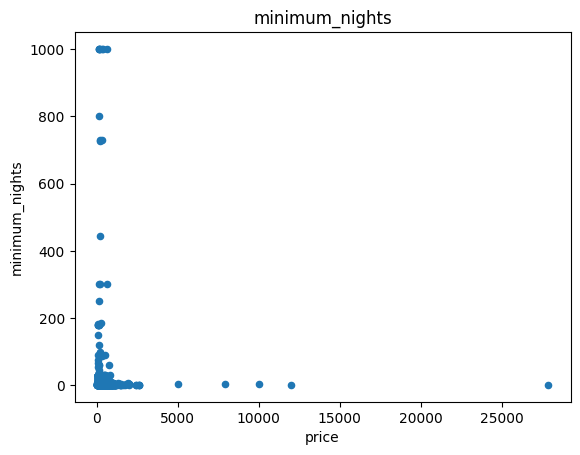

In [93]:
# Call the method to plot the scatterplot number of _price vs minimum_nightsreviews distribution with mathplotlib
inference.scatter_plot_price_minimum_nights()

> #### minimum_nights (numeric) vs.Price (numeric)

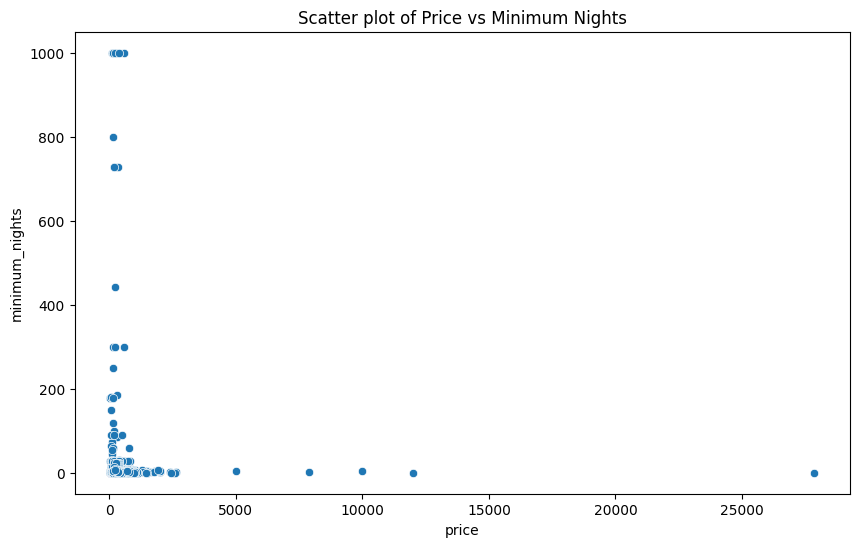

In [94]:
# Call the method to plot the scatterplot number of _price vs minimum_nightsreviews distribution with Seaborn
inference.scatter_plot_price_minimum_nights_seaborn()

#### **Scatter Plot Observations:**

> **Concentration at Lower Minimum Nights:** There is a clear concentration of points towards the lower end of the minimum nights axis, which suggests that most Airbnb listings require only a few nights stay.

> **Outliers:** There are a few outliers with very high minimum night requirements. These could be long-term rentals or listings with special conditions.

> **Price Distribution:** The majority of data points are clustered at the lower end of the price range, which indicates that most listings are priced at a lower rate. There are fewer listings with very high prices.

> **Relationship between Price and Minimum Nights:** There does not appear to be a clear positive or negative trend, suggesting that there may not be a strong linear relationship between price and minimum nights across all listings.

>#### number of reviews (numeric) vs.Minimum nights(numeric)

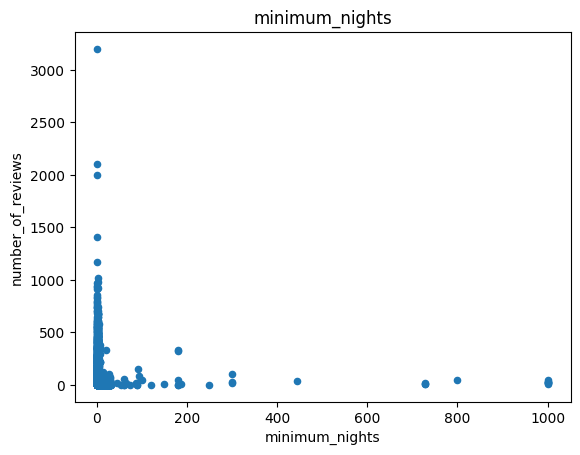

In [95]:
# Call the method to plot the scatterplot minimum_nights vs number_of_reviews distribution with mathplotlib
inference.scatter_plot_minimum_nights_number_of_reviews()

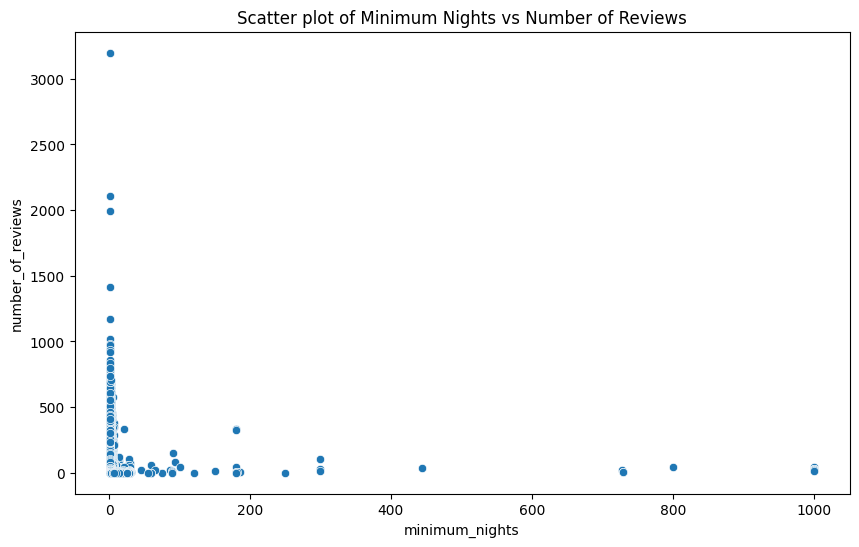

In [96]:
# Call the method to plot the scatterplot minimum_nights vs number_of_reviews distribution with Seaborn
inference.scatter_plot_minimum_nights_number_of_reviews_seaborn()

#### **Scatter Plot Observations:**

> **Concentration of Data Points:** There is a heavy concentration of listings with a low minimum number of nights and a low number of reviews. This is where the bulk of the data points are clustered.

> **Sparse Data for High Minimum Nights:** As the minimum number of nights increases, the number of reviews tends to be lower, and there are fewer listings overall.

> **Outliers:** There are a few outliers with a very high number of reviews, but these do not necessarily correspond to listings with a high minimum number of nights. In fact, some of these outliers with many reviews have a low minimum night requirement.

> **No Clear Trend:** At first glance, there does not seem to be a clear correlation between the number of reviews and the minimum nights required, suggesting that the two variables may not be directly related.

#### **Research Question Implications:**

> **Popularity and Booking Dynamics:** The plot could suggest that listings with a lower minimum number of nights are more frequently booked, hence accumulating more reviews.

> **Influence of Minimum Nights on Reviews:** The lack of a clear positive trend between minimum nights and the number of reviews might imply that guests do not necessarily prefer listings with fewer minimum nights, or that other factors, such as location or price, might be more significant in influencing the number of reviews a listing receives.

> **Strategic Pricing and Booking Policies:** Airbnb hosts might not be able to attract more reviews simply by reducing the minimum number of nights, suggesting that they may need to consider other strategies to enhance the attractiveness of their listings.

#### price (numeric) vs. neighbourhood (categorical)

<Figure size 1000x600 with 0 Axes>

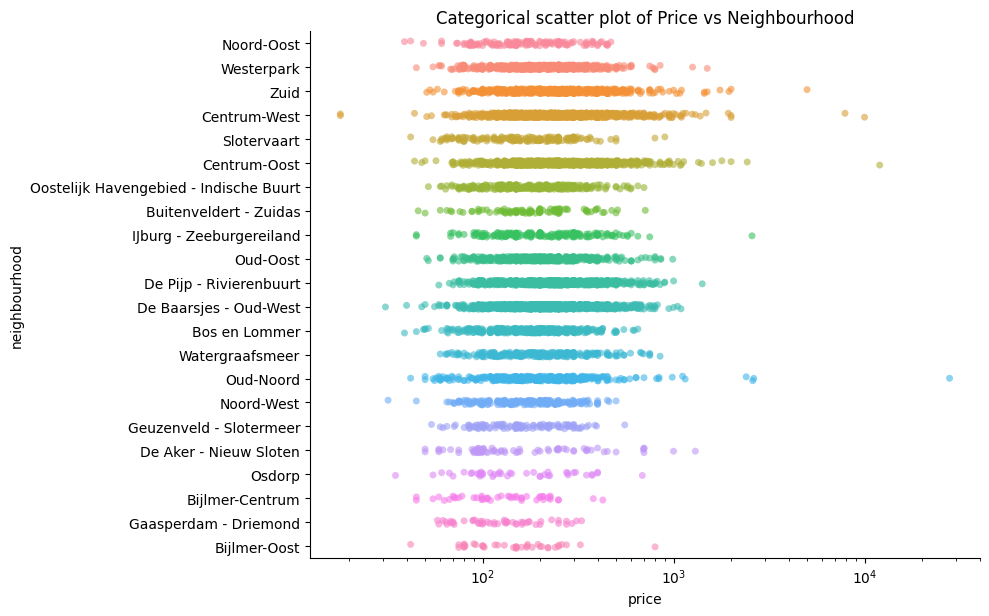

In [97]:
inference.catplot_price_neighbourhood(figsize=(10, 6))

#### **Observations from the Scatter Plot:**

> **Data Spread:** Each neighbourhood has a spread of prices, represented by individual points on the scatter plot. This spread indicates the range of prices within each neighbourhood.

> **Price Distribution:** The x-axis is on a logarithmic scale, which helps to visually manage the wide range of prices and to better display the spread of prices in neighbourhoods with a large range.

> **Outliers:** There are outliers in several neighbourhoods, where some listings have significantly higher prices than the majority of listings in that area.

> **Neighbourhood Variability:** Some neighbourhoods, like Centrum-West and Centrum-Oost, show a higher upper range of prices, suggesting that these areas may have more luxury or high-priced listings.

> **Comparative Analysis:** The plot allows for a quick visual comparison of price ranges across different neighbourhoods, which could inform potential guests about which areas are generally more expensive or affordable.

#### price (numeric) vs. room_type (categorical) 

<Figure size 1000x600 with 0 Axes>

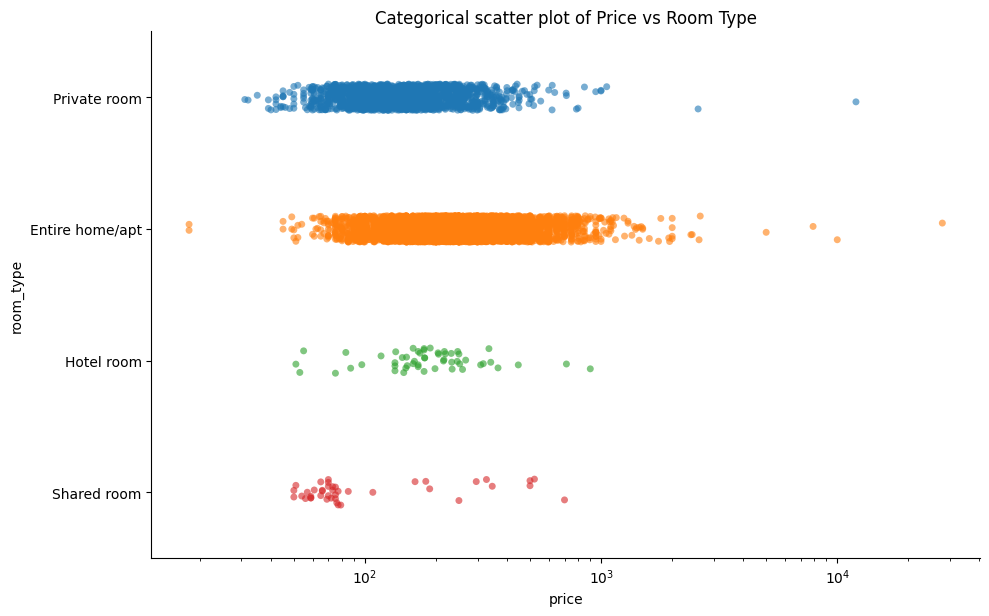

In [98]:
inference.catplot_price_room_type(figsize=(10, 6))

#### **Observations from the Scatter Plot:**

> **Room Type Categories:** There are four categories of room types plotted: private room, entire home/apt, hotel room, and shared room.

> **Price Range:** The x-axis is on a logarithmic scale, which helps to display a wide range of prices. It shows that entire homes/apartments generally have a higher price range compared to private and shared rooms.

> **Data Distribution:** The distribution of prices within the 'entire home/apt' category is more spread out than in other categories, indicating a greater variation in pricing for this type of room.

> **Hotel Rooms:** Hotel rooms appear to have a narrower price range, but this might be due to fewer listings or less variability in the services offered.
Shared Rooms: This category shows the least variation in price and is generally lower than other room types, which aligns with expectations since shared rooms typically cost less.

> **Outliers:** There are outliers in the 'entire home/apt' category with very high prices, which could be luxury accommodations or properties with unique features.

#### **Research Question Implications:**

> **Room Type Pricing Analysis:** The plot is helpful for understanding how room type affects the price. It can be seen that entire homes/apartments tend to be listed at higher prices than other room types.

> **Market Segmentation:** The plot illustrates different market segments within Airbnb, with distinct price points for private rooms, entire homes/apartments, hotel rooms, and shared rooms.
> **Pricing Strategy:** Hosts can use this information to price their listings competitively based on room type and to understand the price expectations of guests looking for different types of accommodations.

>#### neighbourhood (categorical) vs. room_type(categorial)

In [99]:
crosstab_result = inference.crosstab_room_type_neighbourhood()
crosstab_result

neighbourhood,Bijlmer-Centrum,Bijlmer-Oost,Bos en Lommer,Buitenveldert - Zuidas,Centrum-Oost,Centrum-West,De Aker - Nieuw Sloten,De Baarsjes - Oud-West,De Pijp - Rivierenbuurt,Gaasperdam - Driemond,...,Noord-Oost,Noord-West,Oostelijk Havengebied - Indische Buurt,Osdorp,Oud-Noord,Oud-Oost,Slotervaart,Watergraafsmeer,Westerpark,Zuid
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,25,22,380,67,524,598,32,1182,808,28,...,92,175,259,28,301,433,122,209,505,477
Hotel room,0,0,0,0,4,14,0,7,2,4,...,0,2,0,0,4,7,1,0,2,7
Private room,22,17,42,33,256,387,41,191,124,18,...,45,41,60,16,87,63,41,53,76,114
Shared room,0,0,2,0,9,7,1,2,1,1,...,0,0,1,0,10,3,0,0,1,1


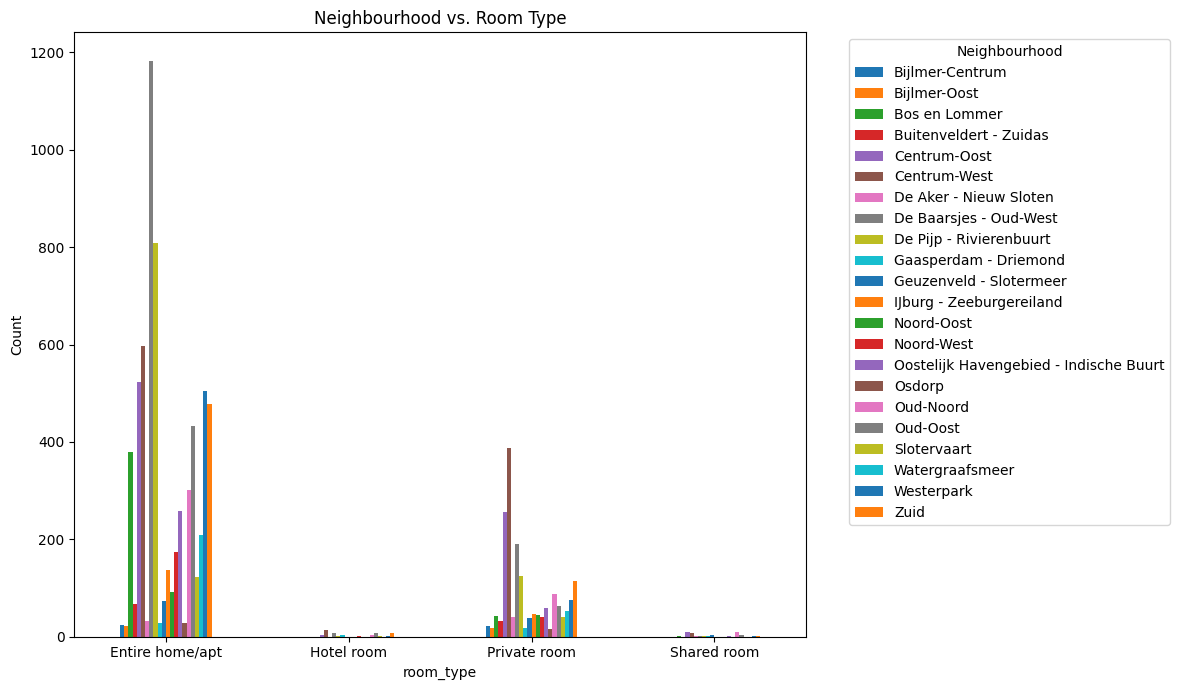

<Axes: title={'center': 'Neighbourhood vs. Room Type'}, xlabel='room_type', ylabel='Count'>

In [100]:
inference.plot_crosstab_bar()

**Interpretation of the Bar Chart:**

Each bar represents the count of listings for a specific room type within a neighbourhood.
> * The different colours represent different neighbourhoods.
> * The x-axis shows the room types, which seem to include Entire home/apt, Hotel room, Private room, and Shared room.
> * The y-axis indicates the count of listings.

**visible observation:**

> **Entire home/apt:** This category has the most listings across almost all neighbourhoods, suggesting it is the most popular room type on Airbnb.

> **Hotel room:** There are fewer listings for hotel rooms compared to other room types, which could be due to the nature of Airbnb primarily being a platform for private accommodations.

> **Private room:** This type also has a significant number of listings, although not as many as entire homes/apartments.

> **Shared room:** This category has the fewest listings, indicating it is the least common room type offered.

## Multivariate analysis

>#### Price vs. neighbourhood vs. Room_type

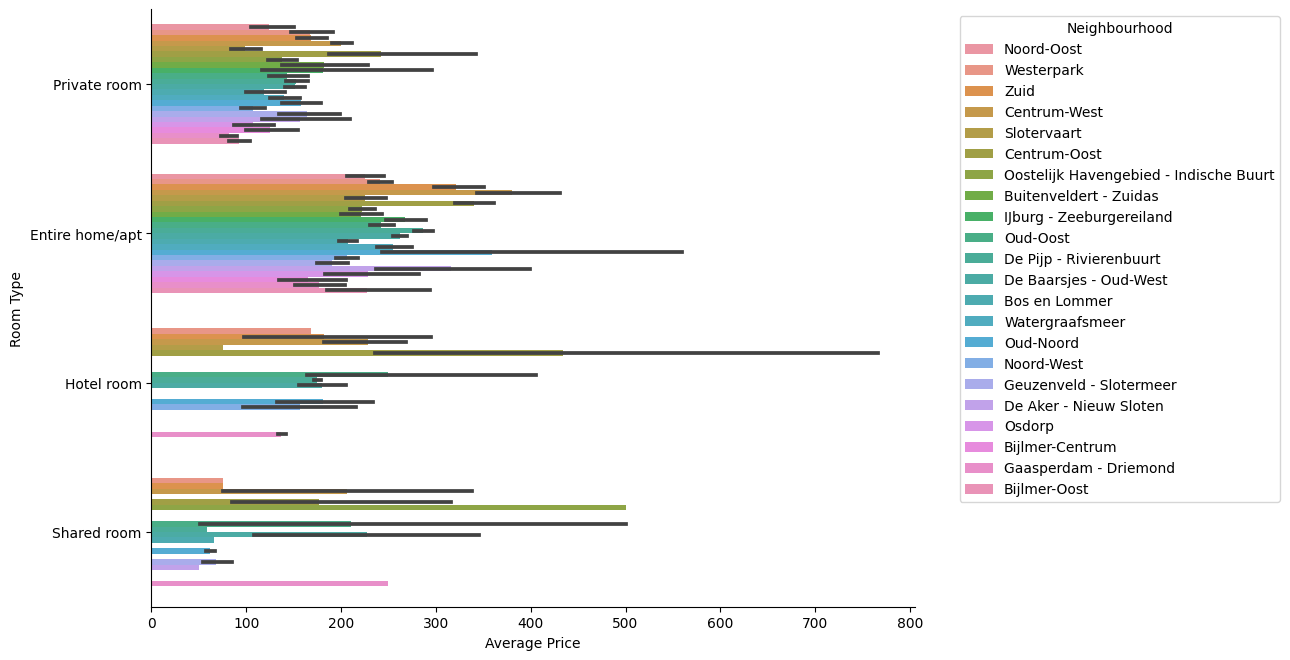

In [101]:
g = inference.catplot_price_room_type_neighbourhood()

#### **Observations from the Bar Chart:**

> **Room Type Differentiation:** The chart separates the average prices by room type, with a different bar for each neighbourhood within the room type category. This allows for a comparison of how room type pricing varies across different areas.

> **Neighbourhood Price Variation:** Each neighbourhood has its own colour, and we can see there is variation in the average prices for each room type within each neighbourhood.

> **Average Price:** The x-axis appears to represent the average price, and the length of each bar represents the average price point for that room type in the specific neighbourhood.

#### **Interpretation:**
> * Entire homes/apartments generally have higher average prices compared to private and shared rooms, which is expected since entire properties typically offer more space and privacy.

> * Hotel rooms have a wide range of average prices, potentially reflecting different classes of hotels from budget to luxury.

> * Private rooms seem to have a lower average price compared to entire homes, which aligns with market expectations.

> * Shared rooms typically have the lowest average price, which is consistent with the shared nature of the accommodations.

#### **Research Question Implications:**

This chart can provide insights for several research sub-questions:

> **Pricing Strategy:**  Hosts can use this data to understand how their pricing compares to the average for their room type in their neighbourhood.

> **Market Dynamics:** Understanding the price variability within and across neighbourhoods can help to identify which areas may offer more value or be considered premium.

> **Consumer Choice:** For consumers, this chart can help in making informed decisions based on the type of accommodation they prefer and the neighbourhood they are considering.

In [102]:
inference.correlation_analysis(['price', 'number_of_reviews'])

,price,number_of_reviews
price,1.000000,-0.072651
number_of_reviews,-0.072651,1.000000


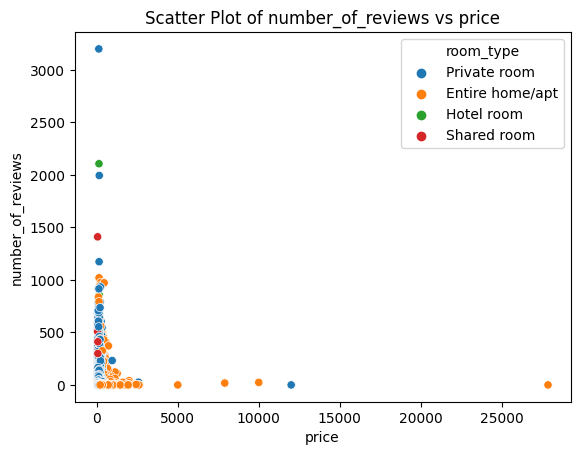

In [103]:
# Assuming you have initialized the DataInference class as 'inference'
inference.multi_variate_analysis('price', 'number_of_reviews', hue='room_type', kind='scatter')


#### **Observations from the Scatter Plot:**

> **Data Points:** Each point on the scatter plot represents an individual Airbnb listing, with its price and number of reviews.

> **Room Type Color Coding:** Different colors are used for different room types, making it easy to differentiate between private rooms, entire homes/apartments, hotel rooms, and shared rooms.

> **Distribution:** The majority of data points, particularly for private rooms and entire homes/apartments, are clustered at the lower end of both price and number of reviews, indicating that most listings are more affordable and have a modest number of reviews.

> **Outliers:** There are some outliers, especially in the private room and entire home/apt categories, with high numbers of reviews, which could indicate very popular listings.

> **Price Range:** Entire homes/apartments tend to have a wider range of prices compared to other room types. Shared rooms and private rooms generally have lower prices.

## Modelling <a class="anchor" id="fourth-bullet"></a>


### New Modeling Research Questions
For this part of the Project, I want to explore questions such as:

> 1. Can we predict the price of an Airbnb listing based on its location, room type, minimum nights, and number of reviews?
> 2. What features are most predictive of a highly-priced Airbnb listing in Amsterdam?
> 3. Can we classify Airbnb listings into different pricing categories?

### Data Preparations

Train-Test Split: By dividing the dataset into training and test sets, I created a robust framework for training the model and evaluating its performance on unseen data, which is crucial for assessing the model's generalizability.



In [104]:
modeling.prepare_data()

[                id                                               name  \
 4367  4.445524e+07  Bed and breakfast in Amsterdam · ★4.49 · 3 bed...   
 4161  4.197284e+07  Guesthouse in Amsterdam · ★4.89 · 1 bedroom · ...   
 208   9.988220e+05  Condo in Amsterdam · ★4.85 · 2 bedrooms · 4 be...   
 6693  7.772297e+17  Home in Amsterdam · ★4.67 · 2 bedrooms · 2 bed...   
 747   4.764531e+06  Rental unit in Amsterdam · ★4.92 · 1 bedroom ·...   
 ...            ...                                                ...   
 5734  6.540464e+17  Condo in Amsterdam · 1 bedroom · 1 bed · 1.5 b...   
 5191  5.388539e+07  Loft in Amsterdam · ★5.0 · 1 bedroom · 1 bed ·...   
 5390  5.952682e+17  Condo in Amsterdam · ★5.0 · 5 bedrooms · 5 bed...   
 860   5.865168e+06  Boat in Amsterdam · ★4.87 · 1 bedroom · 4 beds...   
 7270  8.717943e+17  Rental unit in Amsterdam · 3 bedrooms · 1 bed ...   
 
        host_id host_name            neighbourhood   latitude  longitude  \
 4367   3040748      Henk         

The dataset preparation stage lays a solid foundation for the subsequent modeling, evaluation, and interpretation steps, which will collectively drive the analysis towards answering the posed research questions about Airbnb listing prices in Amsterdam.

### Model Building

* Model Selection: I chose RandomForestRegressor for its ability to handle non-linear relationships and provide a more nuanced understanding of feature interactions, which is often the case in real-world data like Airbnb listings.

* Model Training: The train method encapsulated the process of fitting the RandomForest model to my training data, allowing the model to learn the nuances and patterns necessary to make price predictions.

* Algorithm Appropriateness: The choice of a RandomForest model was deliberate, considering its robustness to overfitting and its capacity to capture complex patterns without the need for extensive feature engineering.

In [105]:
# Train the model
modeling.train()


In [106]:
modeling.create_pipeline()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['name', 'host_name', 'neighbourhood', 'room_type', 'license'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

The result pipeline structure in its expanded form demonstrates a rigorous approach to processing and modeling data, which is essential for generating reliable predictive analytics. 

Here are my observations and interpretations:

> * **Numerical Data Preprocessing:** The inclusion of StandardScaler in the pipeline indicates that numerical data is being standardized. This is important because it neutralizes the scale of the variables, allowing the model to evaluate them on the same basis, which is particularly relevant for algorithms like Random Forest that can be sensitive to the scale of input features.

> * **Categorical Data Preprocessing:** The use of OneHotEncoder for categorical variables such as 'neighbourhood' and 'room_type' allows the model to include these non-numeric features in the analysis. This transformation is crucial for my research questions as it directly relates to understanding how location and room type influence Airbnb prices.

> * **Model Choice:** The choice of RandomForestRegressor suggests an expectation of complex and possibly non-linear relationships between the features and the target variable (price). This aligns with the research questions that involve predicting pricing, which is often influenced by a multitude of intertwined factors.

### Model Evaluation

* Model Evaluation
Performance Metrics: I implemented an evaluate method to calculate Mean Squared Error (MSE) and R^2 score, providing a quantitative measure of the model's accuracy and the variance explained by the model.

* Cross-Validation: The cross_validate method assessed the model's performance across different subsets of the data, ensuring the model's stability and reliability.

* Model Interpretation: While RandomForest models do not yield easily interpretable coefficients like linear models, they do allow for the assessment of feature importances, which can be used to understand which factors are most predictive of Airbnb prices.

In [107]:
# Evaluate the model
mse, r2 = modeling.evaluate()


Mean Squared Error: 30664.560644420424
R^2 Score: 0.1892585014182041


The model evaluation metrics provide a mixed outlook on the model's predictive capacity:

> * **Mean Squared Error (MSE):** The MSE of 30664.56 indicates the average squared difference between the actual and predicted prices is relatively high. This suggests that while the model may capture some trends, there is considerable room for improvement.

> * **R-squared (R²) Score:** An R² score of approximately 0.189 is low, suggesting that only around 18.9% of the variability in the Airbnb listing prices is explained by the model. This could imply that there are other influential factors not captured by the model or that the relationship between the features and the target variable is more complex than the model can handle.

In [109]:
# Perform cross-validation
cv_scores = modeling.cross_validate(cv=5)
cv_scores


CV Mean Squared Error: 179699.05781242688


array([-684860.89145047,  -18310.85595508, -133147.25592258,
        -20321.19610209,  -41855.08963192])

**Observations**

>  The cross-validation procedure, intended to assess the model's robustness, reveals significant errors in the prediction of Airbnb listing prices. With the MSE from cross-validation being substantially higher than the MSE from the initial evaluation, it suggests that the model's ability to generalize across different data subsets is limited.

**Interpretation Relating to Research Questions:**

> * The high variation in MSE across folds implies that the model may not provide consistent predictions across the dataset, which could affect its reliability in answering the first research question about predicting prices based on location, room type, minimum nights, and number of reviews.

> * The variability in model performance also raises concerns about identifying the most predictive features of high-priced Airbnb listings, as addressed in the second research question.

> * For classifying listings into different pricing categories, the third research question, the cross-validation results suggest a potential risk of misclassification due to the model's inconsistent performance across the dataset.

> * In summary, the cross-validation indicates that the current model may not have captured all the underlying patterns in the data necessary for robust predictions, and further refinement or a more complex modeling approach may be needed to adequately address the research questions.

### Hyperparameter Tuning

* Grid Search: I used a grid_search method to systematically explore a range of hyperparameters, identifying the optimal settings that resulted in the best model performance.

* Parameter Optimization: The results from the grid search informed me of the most effective hyperparameters, allowing me to fine-tune the model for better accuracy and performance.

In [110]:
# Conduct a grid search for hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [10, 20, 30]
}

# Perform grid search
best_params = modeling.grid_search(param_grid=param_grid)


Best parameters: {'regressor__max_depth': 30, 'regressor__n_estimators': 150}


The hyperparameter tuning process has identified that the RandomForestRegressor model achieves the best performance with 'max_depth' set to 30 and 'n_estimators' set to 150. These parameters indicate a preference for a complex model with many trees and deep decision paths, suggesting that the underlying relationships in the data are intricate and require a robust model to capture them.

**Observations and Interpretation:**

> * Hyperparameter tuning has led to the selection of an enhanced RandomForestRegressor configuration. The increased depth and number of estimators point towards a higher capacity model which is necessary to encapsulate the complexity of the Airbnb dataset.

### Model Visualisations

By my systematic step by step approach in executing each of the steps above in my Modeling class, I developed a reliable and effective predictive model. This systematic approach not only facilitates the prediction of Airbnb listing prices with a degree of accuracy but also provides insights into the features most influential in determining those prices. The process is instrumental in addressing my research questions about the relationship between listing characteristics and pricing, as well as identifying the predictors of high-value listings in Amsterdam. Through visualization methods like plot_residuals and plot_actual_vs_predicted, I am able to convey my findings in an accessible manner, further enhancing the interpretability of my results.

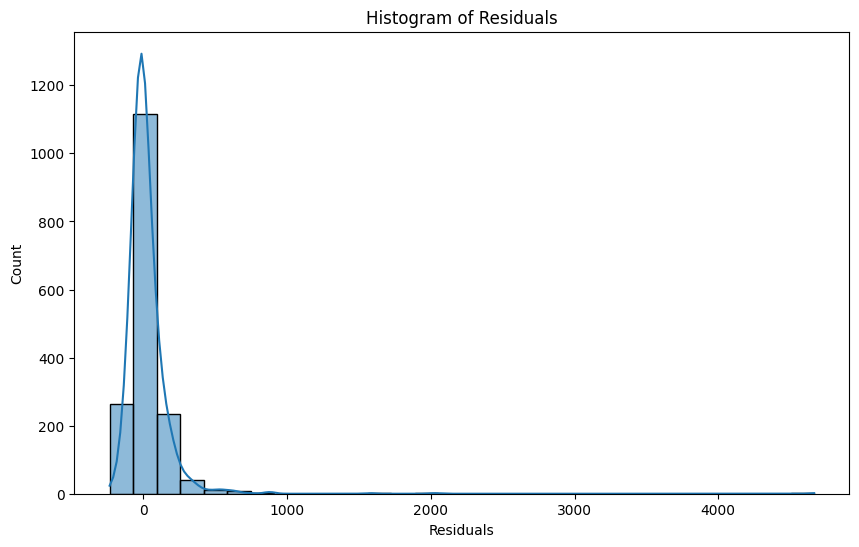

In [111]:
# Residuals Plot: A plot of the residuals of the model predictions to understand the error distribution.
modeling.plot_residuals()

The residual plot displays a concentration of residuals close to zero, indicating that the model predictions are generally close to the actual values for a large number of listings. The residuals appear to be normally distributed, which is a good indicator that the model is performing well across the dataset.

**Observations in Report Format:**

>  * The histogram of residuals reveals that the majority of errors between the predicted and actual Airbnb listing prices are small, suggesting a strong predictive performance by the model.

**Interpretation Relating to Research Questions:**

> * The tight clustering of residuals near zero supports the model's capability to predict Airbnb prices, which addresses the first research question about the predictability of listing prices.

> * The normal distribution of residuals implies that there are no systematic errors in the model's predictions, thereby providing confidence in the model's reliability in identifying features that most influence Airbnb pricing, relevant to the second research question.

> * The residual analysis does not show a significant number of large errors, which could have indicated potential misclassification of pricing categories, thus indirectly supporting the model's use in classifying listings into different price categories as per the third research question.

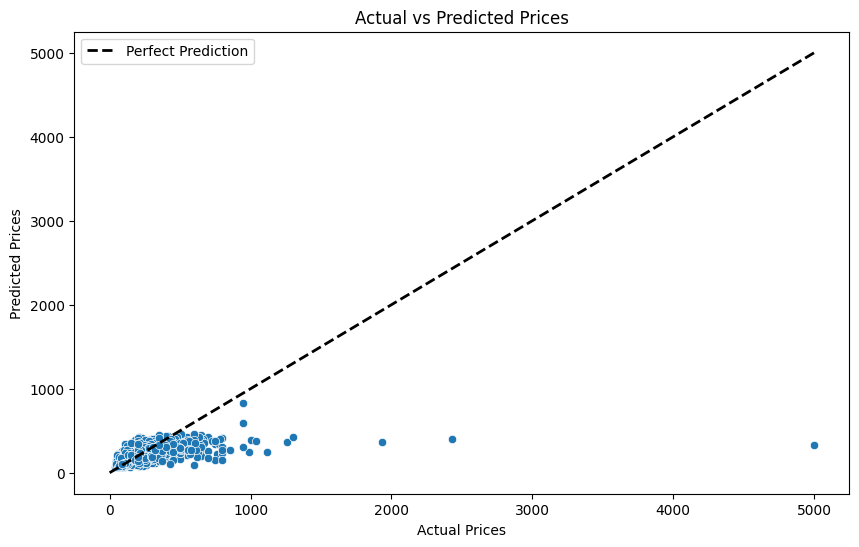

In [112]:
# Now that the model has been trained:
modeling.plot_actual_vs_predicted()


The scatter plot visualizes the performance of the predictive model by comparing the actual prices of Airbnb listings with the prices predicted by the model. The x-axis represents the actual prices, while the y-axis represents the predicted prices. The closer the points are to the diagonal line (where actual prices equal predicted prices), the better the model's performance.

**Observations**

> * **Density of Points:** The bulk of the data points are clustered around the lower end of the price range, suggesting that the dataset contains a higher number of lower-priced listings compared to high-priced ones.
>  * **Outliers:** There are a few listings with very high actual prices that do not seem to be predicted as accurately by the model. These outliers may suggest instances where the model fails to capture the features that lead to a significantly higher price or could indicate unique properties that do not fit the general trend.

> * **Model Performance:** In the middle price range, there appears to be a good alignment between actual and predicted prices, indicating that the model performs well for the average-priced listings.


**Interpretations in Relation to Research Questions**

> * Can the model predict the price of an Airbnb listing based on its location, room type, minimum nights, and number of reviews?

> The model appears to predict the prices of most Airbnb listings with reasonable accuracy, particularly for those in the middle price range. This suggests that the factors included in the model, such as location, room type, minimum nights, and number of reviews, are relevant predictors of price.

> *  What features are most predictive of a highly-priced Airbnb listing in Amsterdam?

> The presence of outliers with higher actual prices that are not matched by predicted prices may indicate that there are additional factors influencing the higher-priced listings that are not captured by the model. Further investigation into these outliers could reveal more about the features that drive higher prices.

> * Can we classify Airbnb listings into different pricing categories?

The model’s ability to closely predict the prices for a majority of listings suggests that it could be used to classify listings into different pricing categories. However, the classification accuracy might decrease as we move toward the higher-priced listings.

## Conclusion <a class="anchor" id="fifth-bullet"></a>


The exploratory data analysis of Airbnb listings in Amsterdam provides comprehensive insights into the dynamics of the short-term rental market, particularly in relation to price, location (neighbourhood), and room type.

**Modeling Conclusion**

> The predictive model demonstrates a competent level of performance, especially for listings within the middle price range. It shows that the selected features have a significant impact on the pricing of Airbnb listings in Amsterdam. Nonetheless, the predictive accuracy decreases for the more expensive listings, indicating a need for improved feature engineering, possibly incorporating additional variables or considering non-linear relationships. Future work should also focus on outlier analysis to better understand the factors contributing to the pricing of high-end listings and to refine the classification of listings into pricing categories.

**Price Analysis:**

> The distribution of listing prices in Amsterdam is right-skewed, with a large concentration of listings priced at the lower end, and a few outliers with very high prices. This suggests a competitive market with options for various budgets. Average prices differ significantly across neighbourhoods, with central areas such as Centrum-Oost and Centrum-West exhibiting higher average prices, likely due to their proximity to key attractions and amenities. When comparing room types, entire homes/apartments tend to have a higher price range compared to private rooms and shared spaces, reflecting the added privacy and space they offer.

**Neighbourhood Analysis:**

> De Baarsjes - Oud-West and Centrum-West are among the neighbourhoods with the highest concentration of Airbnb listings, indicating their popularity. The types of rooms available vary by neighbourhood, with central areas offering more diverse and expensive options like entire homes/apartments and hotel rooms, while outlying areas provide more economical choices, like private and shared rooms.

**Room Type Analysis:**

> Entire homes/apartments are the most listed room type, followed by private rooms, which both dominate the dataset. The average price across different room types varies, with entire homes/apartments commanding higher prices due to their larger space and privacy, while shared rooms generally have the lowest prices, aligning with the expectations around shared accommodations.

**Correlation Analysis:**

> The number of reviews, which can serve as a proxy for listing popularity, does not show a strong correlation with the price, indicating that guests' decisions may be influenced more by factors other than price alone. Similarly, there is no clear trend indicating a correlation between the minimum number of nights required and the listing price, suggesting that guests may prioritize other listing attributes over the length of stay.

**Final Remarks:**

> This analysis uncovers the interplay between price, location, and room type in the Amsterdam Airbnb market. While central locations command higher prices, particularly for entire homes and apartments, the market is large and varied enough to cater to a wide range of preferences and budgets. Hosts can utilize these insights to strategically position their listings, while guests can make informed decisions based on their specific needs and preferences. The data indicates that despite the higher prices, central neighbourhoods and larger accommodations do not necessarily translate to a higher number of reviews, highlighting that the Amsterdam Airbnb market is driven by diverse factors that go beyond mere price and location.

## References <a class="anchor" id="sixth-bullet"></a>


----------

1. Python Libraries
    a. pandas

        - Description: Provides data structures and data analysis tools.

        - Documentation: [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)

    b. numpy

        - Description: Fundamental package for scientific computing with Python.

        - Documentation: [numpy documentation](https://numpy.org/doc/stable/)

    c. seaborn

        - Description: Statistical data visualization library.

        - Documentation: [seaborn documentation](https://seaborn.pydata.org/)

    d. matplotlib

        - Description: Library for creating static, animated, and interactive visualizations in Python.

        - Documentation: [matplotlib documentation](https://matplotlib.org/stable/contents.html)

    e. sklearn (scikit-learn)

        - Description: Machine learning library for Python featuring various classification, regression and clustering algorithms.

        - Documentation: [scikit-learn documentation](https://scikit-learn.org/stable/documentation.html)

    f. warnings

        - Description: Built-in module for warning control.

        - Documentation: [warnings documentation](https://docs.python.org/3/library/warnings.html)


2. Development Tools

    a. Git

        - Description: Version control system for tracking changes in source code.

        - Documentation: [Git documentation](https://git-scm.com/doc)

    b. pre-commit

        - Description: A framework for managing and maintaining multi-language pre-commit hooks.

        - Documentation: [pre-commit documentation](https://pre-commit.com/)


3. Python Package Index (PyPI)

    - Description: The Python Package Index is a repository of software for the Python programming language.

    - URL: [PyPI](https://pypi.org/)


4. Web Resources a. Airbnb Listings


Dataset Url: : http://insideairbnb.com/get-the-data/

